# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle


training_file = "train.p"
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

assert(len(X_train) == len(y_train))
assert(len(X_test) == len(y_test))

print()
print("Image Shape: {}".format(X_train[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train)))
print("Test Set:       {} samples".format(len(X_test)))


Image Shape: (32, 32, 3)

Training Set:   39209 samples
Test Set:       12630 samples


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.
import numpy as np

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

3


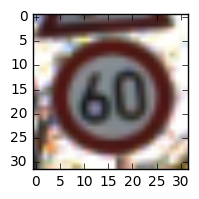

In [4]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import random
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(2,2))
plt.imshow(image)
print(y_train[index])

In [ ]:
print(len(y_train))

Maximum number of sample per lable is: 2250


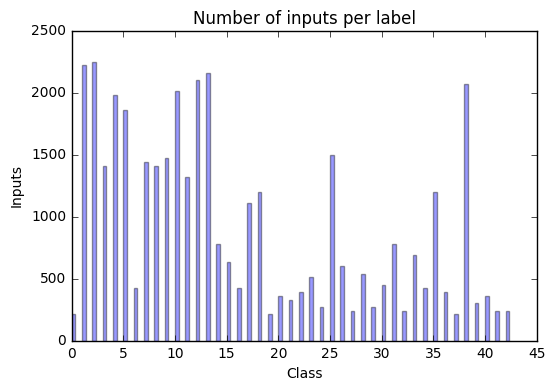

In [5]:
# Let's figure out the number of samples per label
from collections import Counter
label_counts = Counter(y_train)
labels = label_counts.keys()
counts = label_counts.values()
max_count = max(counts)
print("Maximum number of sample per lable is: {}".format(max_count))
mpl_fig = plt.figure()
ax = mpl_fig.add_subplot(111)
ax.set_ylabel('Inputs')
ax.set_xlabel('Class')
ax.set_title('Number of inputs per label')
bar_width = 0.35
opacity = 0.4
ax.bar(labels, counts, bar_width, color='b', alpha=opacity, label='Inputs per label')
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [6]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

import scipy.ndimage
train_features = np.array(X_train)
train_labels = np.array(y_train)

### Preprocessing Step 1: Add more training data set for under-represented labels
### using ideas from https://hackernoon.com/traffic-signs-classification-with-deep-learning-b0cb03e23efb#.vysleqeri
print('Generating additional data...')

angle_range = 20

for i in range(len(counts)):
    input_ratio = int(max_count / label_counts[i])

    if input_ratio <= 1:
        continue

    input_ratio = input_ratio - 1
    new_features = []
    new_labels = []
    mask = np.where(train_labels == i)

    for j in range(input_ratio):
        for feature in train_features[mask]:
            rand_angle = np.random.randint(-1*angle_range, angle_range)
            new_features.append(scipy.ndimage.rotate(feature, rand_angle, reshape=False))
            new_labels.append(i)

    train_features = np.append(train_features, new_features, axis=0)
    train_labels = np.append(train_labels, new_labels, axis=0)
print ('Done')


Generating additional data...
Done


Maximum number of sample per lable is: 2250
total number of samples is: 83007


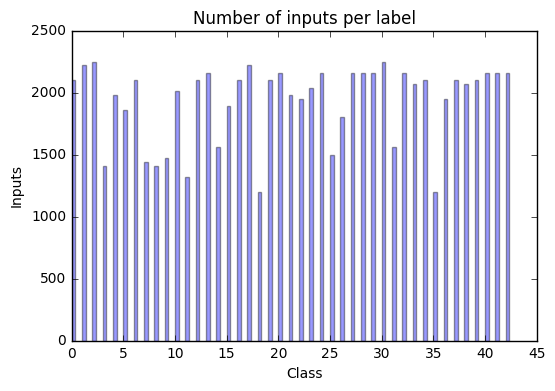

In [7]:
### Display the number of inputs per label after pre-processing

final_label_counts = Counter(train_labels)
labels = final_label_counts.keys()
counts = final_label_counts.values()
max_count = max(counts)
print("Maximum number of sample per lable is: {}".format(max_count))
print("total number of samples is: {}".format(len(train_labels)))
mpl_fig = plt.figure()
ax = mpl_fig.add_subplot(111)
ax.set_ylabel('Inputs')
ax.set_xlabel('Class')
ax.set_title('Number of inputs per label')
bar_width = 0.35
opacity = 0.4
ax.bar(labels, counts, bar_width, color='b', alpha=opacity, label='Inputs per label')
plt.show()

In [8]:
### Preprocessing Step 2: normalization
norm_train_features = (train_features - 128.0)/128.0
print(norm_train_features.shape)
norm_means = np.mean(norm_train_features)
print(norm_means)

(83007, 32, 32, 3)
-0.378457632711


In [9]:
X_test = np.array(X_test)
y_test = np.array(y_test)
norm_X_test = (X_test - 128.0)/128.0

In [10]:
### Preprocessing Step 3: shuffle data then split into training and validation sets
from sklearn.utils import shuffle
X_train_p3, y_train_p3 = shuffle(norm_train_features, train_labels)


In [11]:
print('Randomizing datasets...')
from sklearn.cross_validation import train_test_split
X_train_final, X_valid_final, y_train_final, y_valid_final = train_test_split(
   X_train_p3, y_train_p3,
   test_size=0.3,
   random_state=47
)
print('Data ready...: Training set size is {}, Validation set size is {}'.format(len(X_train_final), len(X_valid_final)))
print('Rule of 30 KPI: {}'.format(30.0/len(X_valid_final)*100.0))

Randomizing datasets...


/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Data ready...: Training set size is 58104, Validation set size is 24903
Rule of 30 KPI: 0.12046741356463078


### Build the Model

In [12]:
### Build the network
import tensorflow as tf


#### LeNet

In [13]:
# Just use LeNet from the class lab with a few parameter changes
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)

    # Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

#### Features and Labels

In [14]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

#### Training pipeline

In [22]:
## hyperparameters 
EPOCHS = 30
BATCH_SIZE = 256
rate = 0.001


In [16]:
logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

#### Model Evaluation

In [17]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

#### Run the model in Tensorflow

In [23]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_final)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_final, y_train_final = shuffle(X_train_final, y_train_final)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_final[offset:end], y_train_final[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid_final, y_valid_final)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'lenet4p2')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.804

EPOCH 2 ...
Validation Accuracy = 0.898

EPOCH 3 ...
Validation Accuracy = 0.947

EPOCH 4 ...
Validation Accuracy = 0.960

EPOCH 5 ...
Validation Accuracy = 0.971

EPOCH 6 ...
Validation Accuracy = 0.974

EPOCH 7 ...
Validation Accuracy = 0.978

EPOCH 8 ...
Validation Accuracy = 0.973

EPOCH 9 ...
Validation Accuracy = 0.982

EPOCH 10 ...
Validation Accuracy = 0.979

EPOCH 11 ...
Validation Accuracy = 0.986

EPOCH 12 ...
Validation Accuracy = 0.985

EPOCH 13 ...
Validation Accuracy = 0.987

EPOCH 14 ...
Validation Accuracy = 0.988

EPOCH 15 ...
Validation Accuracy = 0.988

EPOCH 16 ...
Validation Accuracy = 0.985

EPOCH 17 ...
Validation Accuracy = 0.985

EPOCH 18 ...
Validation Accuracy = 0.989

EPOCH 19 ...
Validation Accuracy = 0.988

EPOCH 20 ...
Validation Accuracy = 0.989

EPOCH 21 ...
Validation Accuracy = 0.990

EPOCH 22 ...
Validation Accuracy = 0.975

EPOCH 23 ...
Validation Accuracy = 0.991

EPOCH 24 ...
Validation Accura

In [78]:
### Test and Validation: (0.992 accuracy on validation) -> about 0.933 accuracy on test 

In [24]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(norm_X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.933


In [25]:
### Prediction computation (to be used on new images)
prediction = tf.nn.softmax(logits)

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

<font color='blue'>
<p> The following pre-processing steps are applied to the data before model training:

<p> 1.1: I first visualized the training data set and found out the numbers of samples per label are quite different (the largest number per label is around 2000, while the smallest number is around 200). To have good traning results, it usually helps if no labels are underrepresented in the training set. Therefore, new data is generated such that the ratios between number of samples per label is no more than 2. Sample from the under represented lable are randomly rotated between the angles of -20 to 20.

<p> 1.2: The data is then normalized. The order of data is also randomized before the next pre-processing set (since the new data generation puts data from the same label together within the array) 

<p> 1.3: The data is then split into training and validation sets
</font>

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

<font color='blue'>
2.1: The new data is generated for the original training data set to bring the total number of "training" data set to be around 80,000. This set is then split into training and validation set, using sklearn's train_test_split function. 30% of the original training set plus newly generate data becomes the validation set. The original test data set are kept the same.
</font>

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

<font color='blue'>
I decided to use the LeNet architecture used in the class Lab without much change. The LeNet architecture has two convolution layers (followed by ReLu activation and maxpooling for each layer). The final three layers are fully connected layers. I used the LeNet code from the class lab and only needed to change a few parameters to accomodate the input data shape (which is (32,32,3)), and the number of labels for this project (which is 43).
</font>

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

<font color='blue'>
In the model trainig pipeline, a softmax function is applied to the outputs of the LeNet function. The loss function is based on the cross entropy between the softmax activation function of the LeNet outputs and the target. The AdamOptimizer (stochastic gradient based optimizer) provided by the tensorflow package is used to train the model.
With this simple model, the hyperparameters are only a few, which are: (1) the number of epochs (2) the batch size (3) the learning rate for the optimizer.
</font>

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

<font color='blue'>
The evaluation framework is set-up to show the model accuracy for the validation data after the model is trained for a specific set of hyperparameters. My initial thoughts was to systematically sweep ranges of the hyperparameters to select a combination of parameters with a good validation accuracy, but after just a few attempts of epoch and batch size values, I got accuracy of about 99%, so I decided to use these values without further exploration.
The selected model gave test accuracy of about 91%, which is reasonble.

The model does seem to overfit the training/validation data based on the accuracy numbers. Some of the future optimizations which I can try later are adding regularizations into the model (e.g. adding dropouts into the architecture and explore a few hyperparameters ranges there, and try to see if the gap between validation and test accuracy can become smaller).
</font>

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

(32, 32, 3)


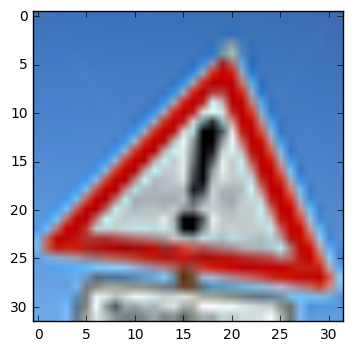

(32, 32, 3)


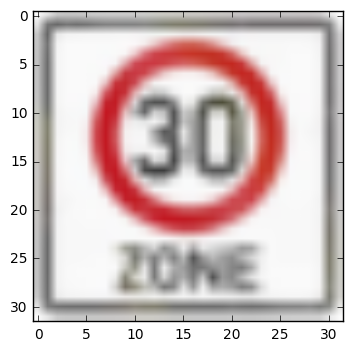

(32, 32, 3)


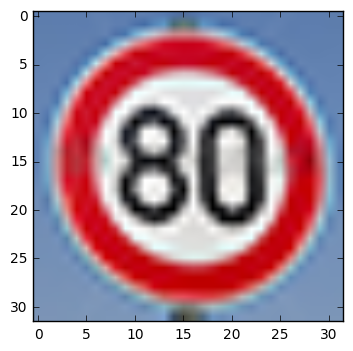

(32, 32, 3)


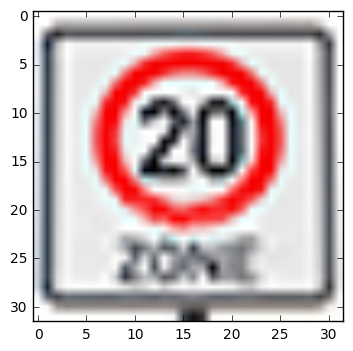

(32, 32, 3)


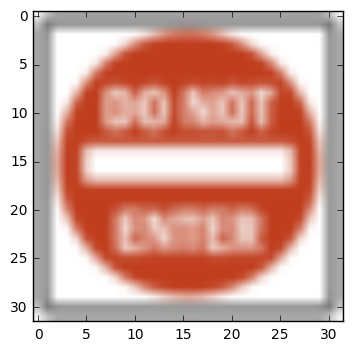

In [26]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.image as mpimg
import scipy

imgs = ['download2.png', 'image2.jpeg', 'sign3.png', 'sign1.png', 'sign2.jpg']

new_input = []

for imgname in imgs:
    image = mpimg.imread('traffic_sign/' + imgname)
    image_data = scipy.misc.imresize(image,(32,32,3))
    print(image_data.shape)
    new_input.append(image_data)
    plt.imshow(image_data)
    plt.show()

In [31]:
### normalize new data
new_input = np.array(new_input)
new_input_norm = (new_input - 128.0) / 128.0
print("top-1 and top-k predictions for the new data set")
### run predictions on new data
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    new_predictions = sess.run(prediction, feed_dict={x: new_input_norm})
    topk = sess.run(tf.nn.top_k(new_predictions,3))
    # print(new_predictions)
    predicted_labels = np.argmax(new_predictions, axis=1)
    print("Top-1 classifications:")
    print(predicted_labels)
    print("Top-3 with softwaremax probabilities and classifications:")
    print(topk)
    print("Done with prediction")

top-1 and top-k predictions for the new data set
Top-1 classifications:
[18 17  2  0 17]
Top-3 with softwaremax probabilities and classifications:
TopKV2(values=array([[  1.00000000e+00,   3.87347612e-08,   3.45179072e-12],
       [  9.98273134e-01,   1.72664097e-03,   1.08985660e-07],
       [  9.78801847e-01,   2.11977996e-02,   3.28454917e-07],
       [  9.35174227e-01,   6.45154491e-02,   2.03409174e-04],
       [  1.00000000e+00,   3.05715902e-13,   4.09814276e-15]], dtype=float32), indices=array([[18, 27, 26],
       [17, 11,  0],
       [ 2,  5,  1],
       [ 0, 20, 17],
       [17,  8,  9]], dtype=int32))
Done with prediction


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

<font color='blue'>
I found 5 images from the internet and prepared them to match the training/test data set in terms of size and normalization.
All of the download images are quite similar to the original data set so I expected most of the images to be classifed correctly.
The images were plotted in the notebook.
</font>

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

<font color='blue'>
I ran the prediction using the trained model and printed out predicated labels based on the top prediction and the top-3 prediction. 
If considering only the top-1 predication, the accuracy is only 60% (only the first, forth and fifth images were classified correctly). For the ones which are predicted correctly, the softmax probability (certainty) are about 100% (first), 93.5% (forth) and 100% (fifth).
For the images which are predicated incorrectly, the softmax probabilities are also high (99.8% and 97.8% also), which indicate that the model might indeed have some overfitting problem. (will need to look into this later, did not have enough time for this project timeframe)
</font>

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

<font color='blue'>
If we use top3 as the metric (w/o considering the certainty values) for the new data set, the performance of our model is a little better (80% accuracy with 4 images classified correctly within top-3).
For the third image, the truth label is at top2, but the model is still having problem with the second image.
The certainty of the top2 for the third image is about 2%.
</font>

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.